In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

In [140]:
firms = ["GOOG","YHOO","FB","AAPL","MSFT","AMZN"]

In [141]:
end = datetime.now()

start = datetime(end.year-3,end.month,end.day)


In [142]:
for each_firm in firms:
    globals()[each_firm] = DataReader(each_firm,"yahoo",start,end)

In [144]:
MSFT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000
mean,40.707722,41.078649,40.367881,40.748464,3.926616e+07,39.317613
std,7.107151,7.178845,7.037476,7.106298,2.172918e+07,7.681554
min,26.490000,26.930000,26.280001,26.459999,9.000500e+06,24.335831
25%,35.034999,35.274999,34.820002,35.010000,2.766265e+07,32.858248
50%,41.450001,41.830002,41.150002,41.549999,3.427740e+07,40.185988
75%,46.205000,46.689999,45.759998,46.235001,4.434790e+07,45.143606
max,56.470001,56.849998,56.290001,56.549999,2.484285e+08,56.549999


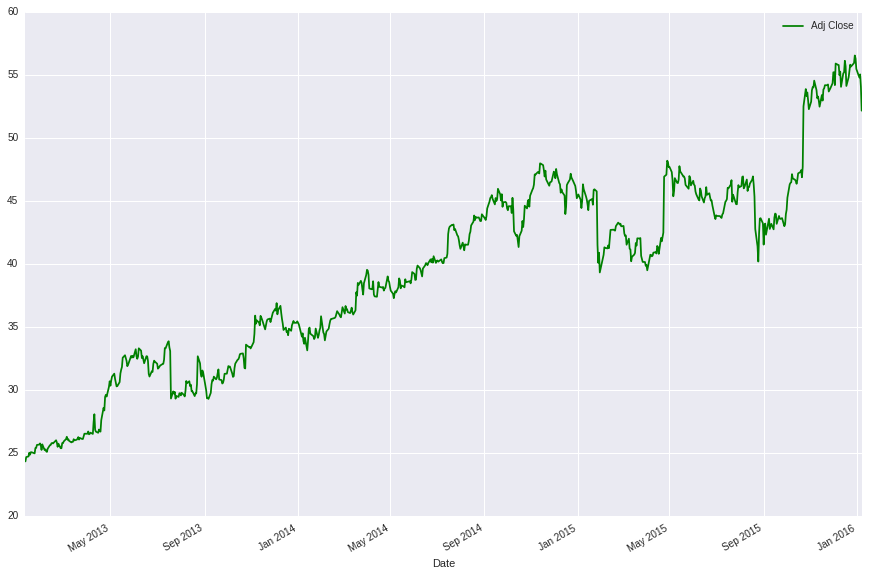

In [147]:
MSFT["Adj Close"].plot(legend = True, figsize = (15,10), color = "green") 

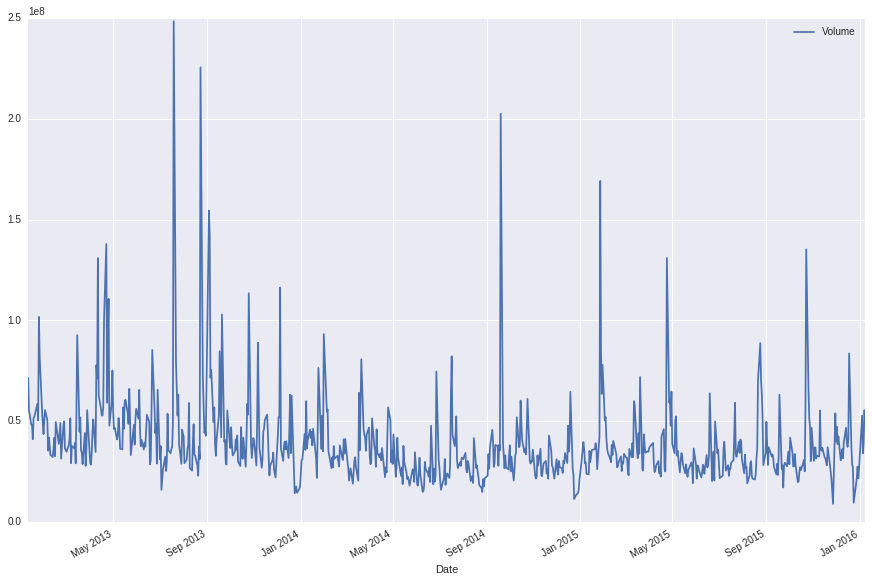

In [146]:
MSFT["Volume"].plot(legend = True, figsize = (15,10))

In [148]:
day_list = [30,90,180]

for day in day_list:
    col_name = "M.avg for %s days" %(str(day))
    MSFT[col_name] = pd.rolling_mean(TSLA["Adj Close"],day)  
   

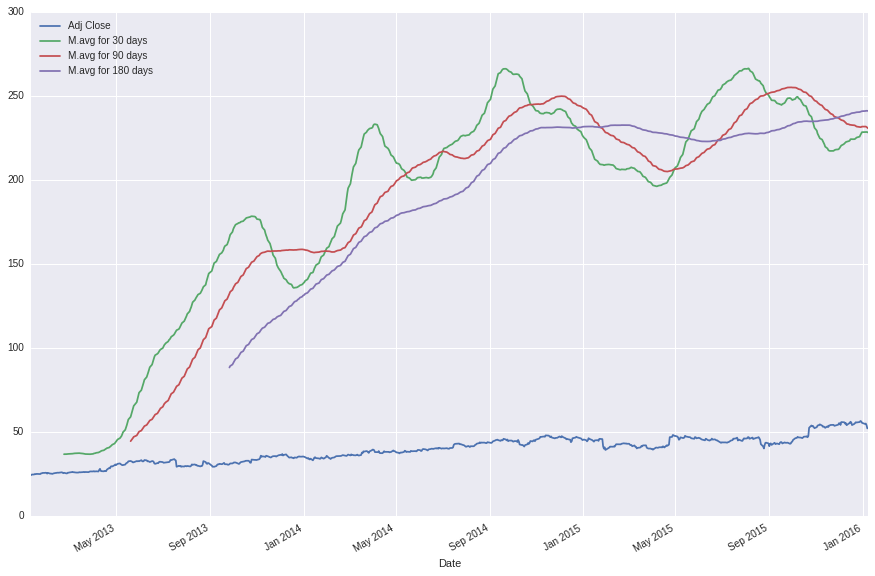

In [149]:
MSFT[["Adj Close", "M.avg for 30 days",
      "M.avg for 90 days",
      "M.avg for 180 days"]].plot(legend = True, figsize = (15,10))

In [150]:
MSFT["Daily Return"]=MSFT["Adj Close"].pct_change()

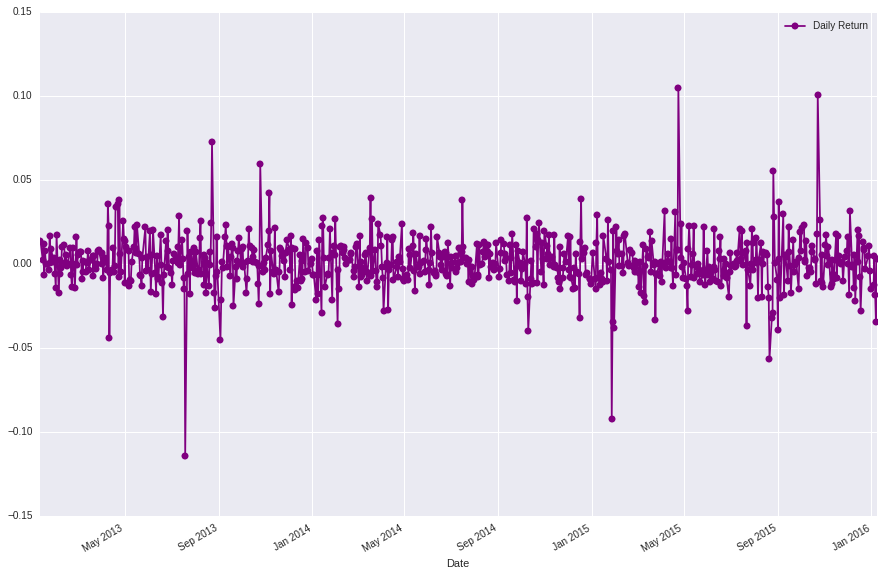

In [152]:
MSFT["Daily Return"].plot(legend = True, 
                          figsize = (15,10),
                         linestyle = "-",
                         marker="o", color = "purple")

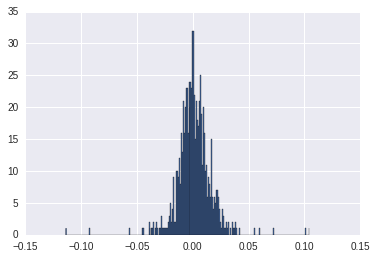

In [156]:
MSFT["Daily Return"].hist(bins = 250)

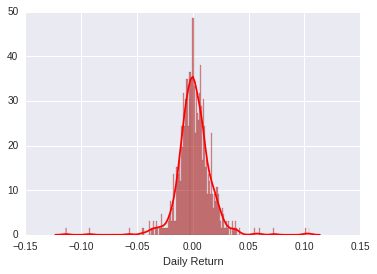

In [155]:
sns.distplot(MSFT["Daily Return"].dropna(), bins = 250, color ="red")

In [157]:
closing_stock_df = DataReader(firms,"yahoo", start,end)["Adj Close"]

In [158]:
daily_return = closing_stock_df.pct_change()

In [159]:
daily_return.head()

,AAPL,AMZN,FB,GOOG,MSFT,YHOO
Date,,,,,,
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-11,-0.006132,0.009799,0.013419,NaN,0.013983,0.015798
2013-01-14,-0.035653,0.017877,-0.024275,NaN,0.002236,0.007258
2013-01-15,-0.031550,-0.003043,-0.027464,NaN,0.011900,0.004632
2013-01-16,0.041509,-0.010923,-0.008306,NaN,-0.006248,0.028176


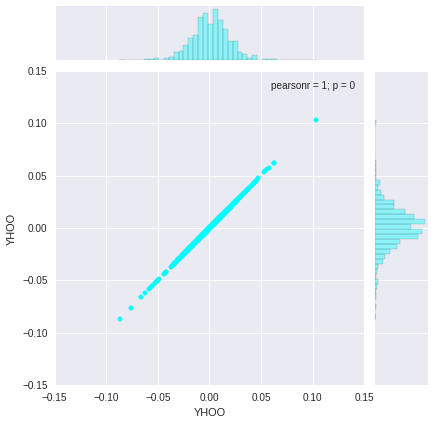

In [162]:
sns.jointplot("YHOO","YHOO",daily_return, color = "cyan")

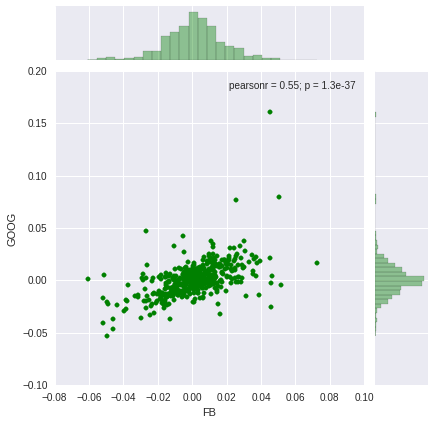

In [163]:
sns.jointplot("FB","GOOG",daily_return,color = "green")

/home/aamir/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


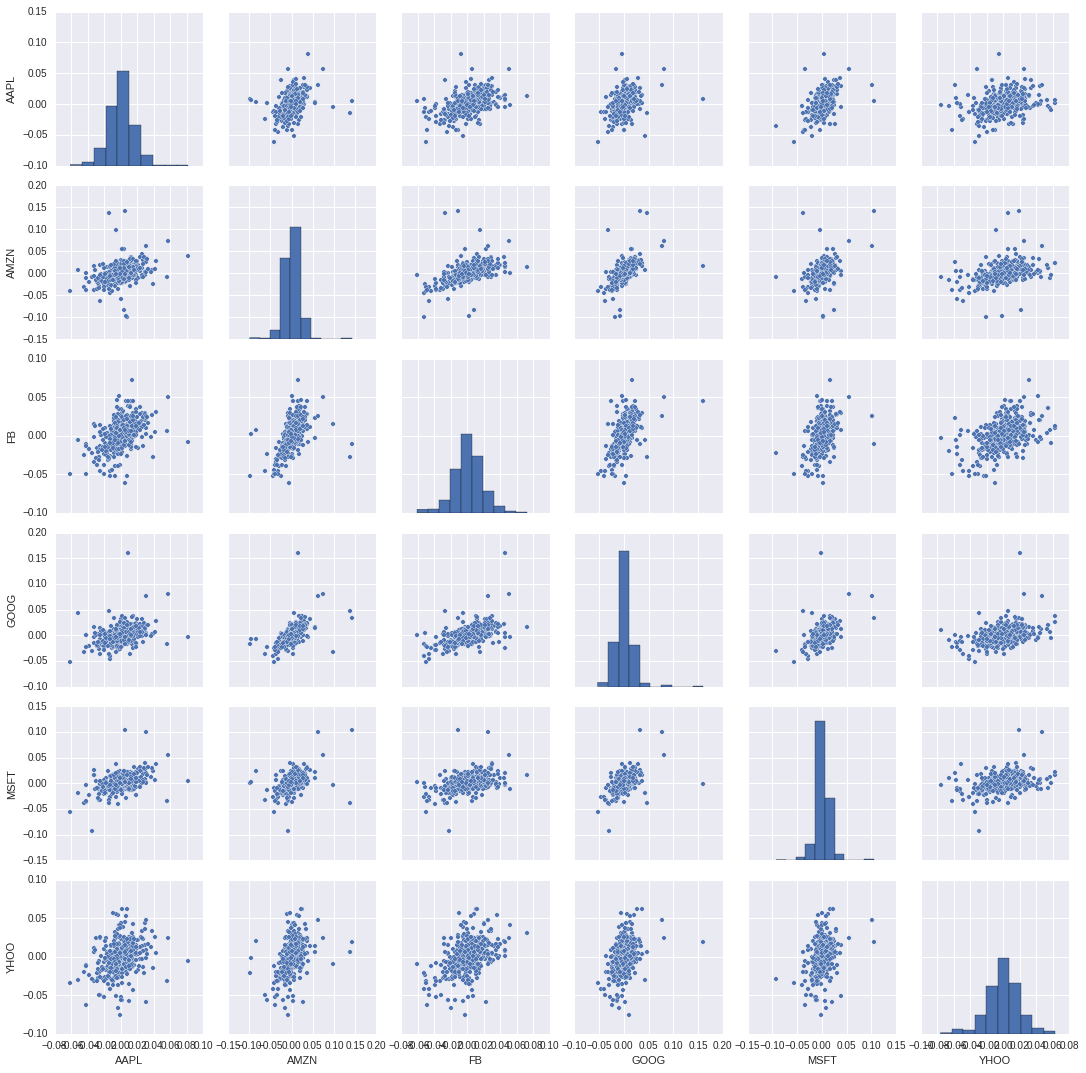

In [164]:
sns.pairplot(daily_return.dropna())

/home/aamir/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


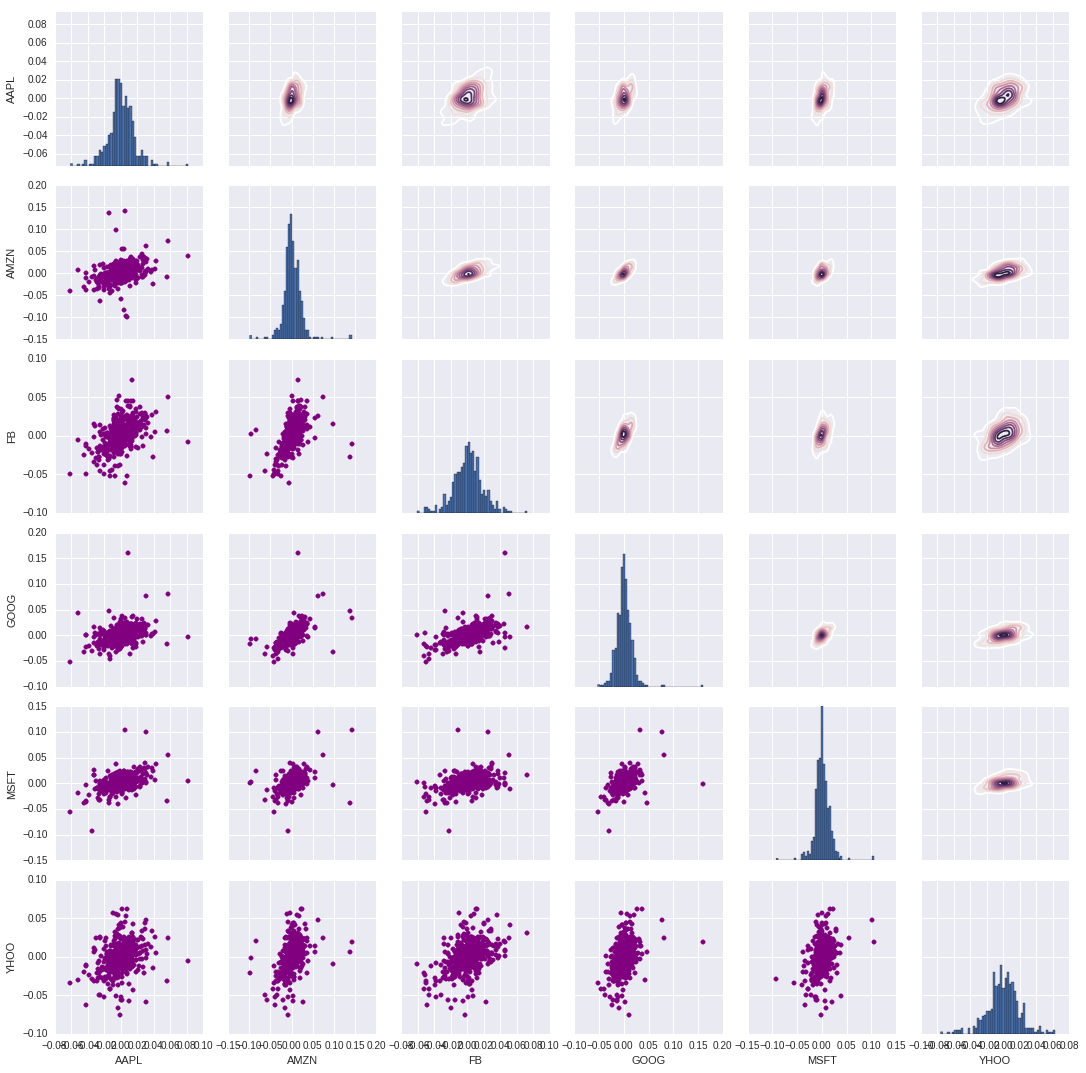

In [165]:
pairs_returns = sns.PairGrid(daily_return.dropna())

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

pairs_returns.map_upper(sns.kdeplot, cmap = cmap)

pairs_returns.map_lower(plt.scatter, color = "purple")

pairs_returns.map_diag(plt.hist, bins = 50)

/home/aamir/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


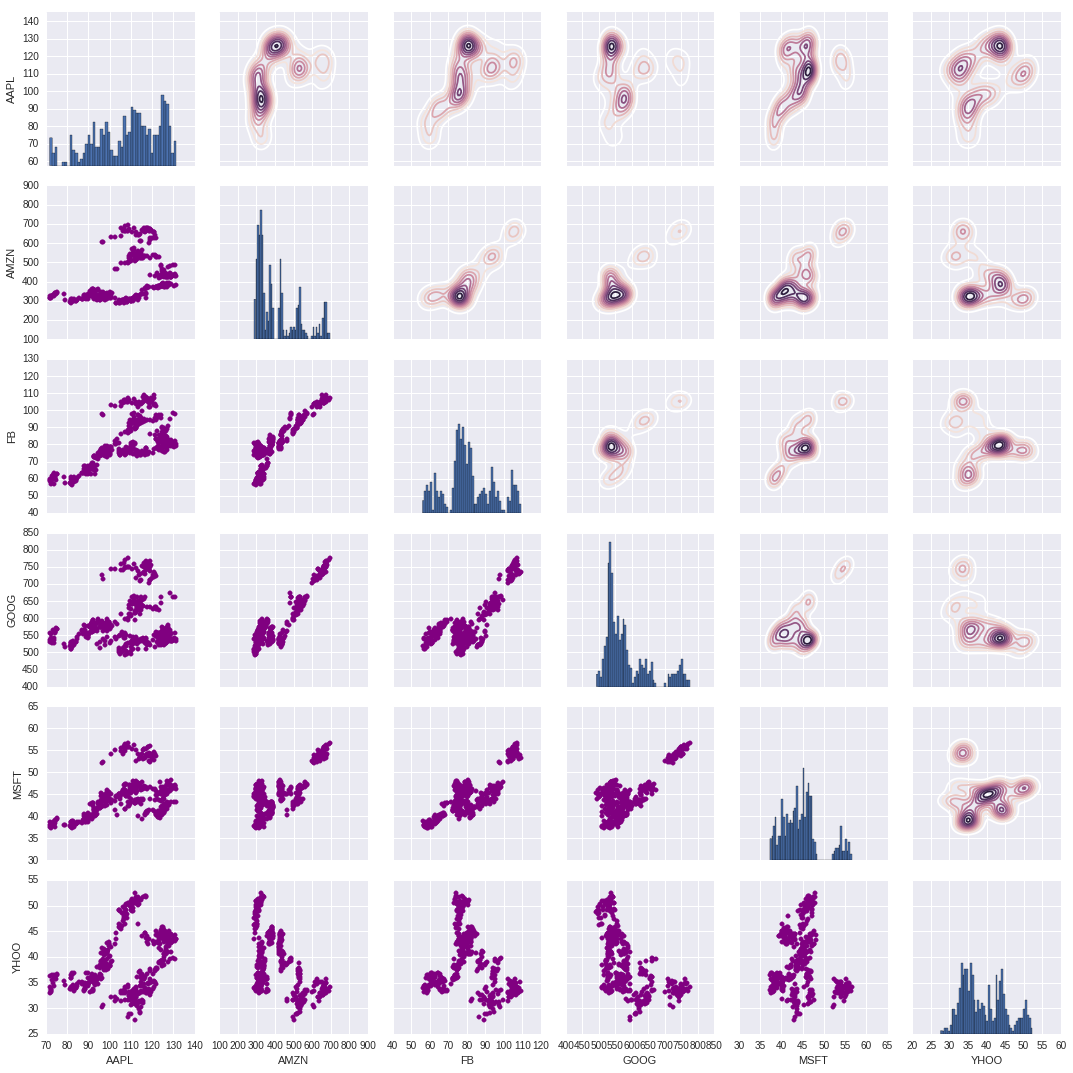

In [166]:
#pairs_returns = sns.PairGrid(daily_return[["GOOG","YHOO","FB","AMZN"]].dropna())

pairs_returns = sns.PairGrid(closing_stock_df.dropna())

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

pairs_returns.map_upper(sns.kdeplot, cmap = cmap)

pairs_returns.map_lower(plt.scatter, color = "purple")

pairs_returns.map_diag(plt.hist, bins = 50)